In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('creditcard.csv')


In [3]:
print(df)

            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [4]:
df['Time'] = df['Time'] / (24 * 60 * 60)


In [5]:
print(df)

            Time         V1         V2        V3        V4        V5  \
0       0.000000  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1       0.000000   1.191857   0.266151  0.166480  0.448154  0.060018   
2       0.000012  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3       0.000012  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4       0.000023  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  1.999838 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  1.999850  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  1.999861   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  1.999861  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  1.999907  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.01830

In [6]:
import pandas as pd

# DataFrame named summary_stats
summary_stats = pd.DataFrame({
    'Mean': [10, 20, 30],
    'Std Dev': [1, 2, 3]
})

# Transposed the summary statistics dataframe for better readability
summary_stats_transposed = summary_stats.transpose()

print(summary_stats_transposed)



          0   1   2
Mean     10  20  30
Std Dev   1   2   3


In [7]:
df.shape

(284807, 31)

In [8]:
null_values = df.isnull().sum()

print(null_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
class_counts = df['Class'].value_counts()
print(class_counts)
print("By the results, the rows having 1 are fraud transactions and rows having 0 are legitimate transactions.")

Class
0    284315
1       492
Name: count, dtype: int64
By the results, the rows having 1 are fraud transactions and rows having 0 are legitimate transactions.


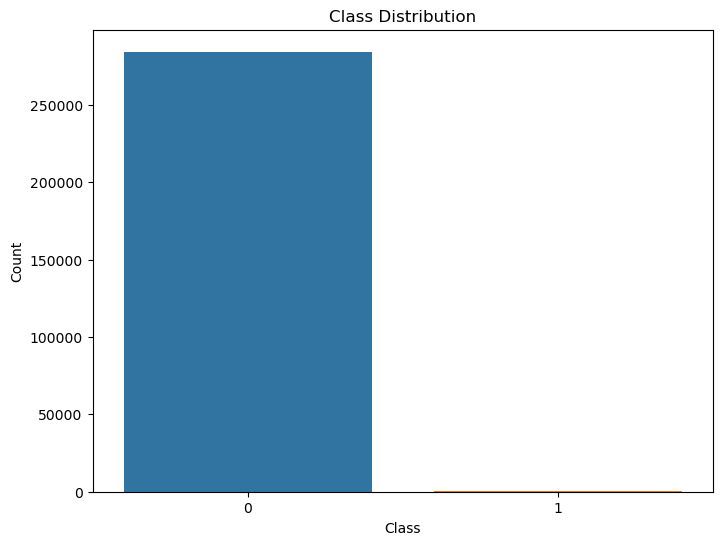

In [10]:
# Visualizing the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

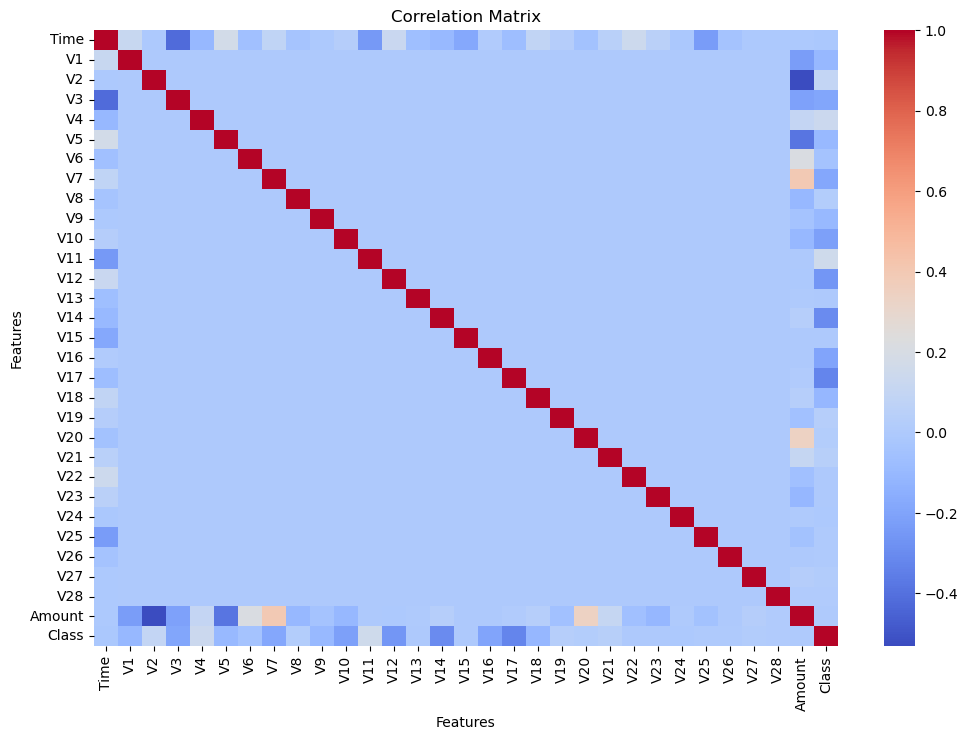

In [11]:
# correlation matrix
corr = df.corr()

# Visualizing correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [12]:
# Differentiate between fraudulent and legitimate transactions
fraudulent_df = df[df['Class'] == 1]
legitimate_df = df[df['Class'] == 0]

# Print
print("Number of fraudulent transactions:", len(fraudulent_df))
print("Number of legitimate transactions:", len(legitimate_df))

Number of fraudulent transactions: 492
Number of legitimate transactions: 284315


In [13]:
from sklearn.utils import resample
# Differentiate between fraudulent and legitimate transactions
fraudulent_df = df[df['Class'] == 1]
legitimate_df = df[df['Class'] == 0]

# Undersample legitimate transactions to match the number of fraudulent transactions
legitimate_downsampled = resample(legitimate_df, replace=False, n_samples=len(fraudulent_df), random_state=42)

# Append resampled data to previous data
data_balanced = pd.concat([fraudulent_df, legitimate_downsampled])



In [14]:
# Print the number of fraudulent and legitimate transactions after undersampling
print("Number of fraudulent transactions after undersampling:", len(data_balanced[data_balanced['Class'] == 1]))
print("Number of legitimate transactions after undersampling:", len(data_balanced[data_balanced['Class'] == 0]))

Number of fraudulent transactions after undersampling: 492
Number of legitimate transactions after undersampling: 492


# data splitting

In [15]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X_balanced = data_balanced.drop('Class', axis=1)
y_balanced = data_balanced['Class']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Print the shapes of train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (787, 30) (787,)
Test set shape: (197, 30) (197,)


In [16]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")


Logistic Regression Accuracy: 0.9695


In [17]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")


Decision Tree Accuracy: 0.8985


In [18]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


Random Forest Accuracy: 0.9543


In [19]:
import joblib
# data splitted into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict target variable on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# To save the trained model
joblib.dump(rf_classifier, 'credit_card_fraud_detection_model.pkl')

Accuracy Score: 0.949238578680203


['credit_card_fraud_detection_model.pkl']

In [20]:
# parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
joblib.dump(rf_classifier, 'credit_card_fraud_detection_model.pkl')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [21]:
# best estimator
best_estimator = grid_search.best_estimator_

# Predict target variable on the test data using the best estimator
y_pred_tuned = best_estimator.predict(X_test)

# Calculate and print the accuracy score after hyperparameter tuning
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Accuracy Score after Hyperparameter Tuning:", accuracy_tuned)

Accuracy Score after Hyperparameter Tuning: 0.949238578680203


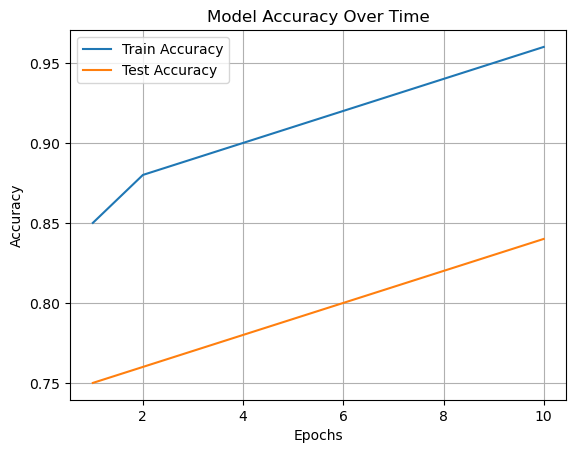

In [22]:
import logging
import matplotlib.pyplot as plt

#  logging
logging.basicConfig(filename='model_training.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# During training
# Log model performance metrics
train_accuracy = 0.85  # Example accuracy
logging.info(f'Training Accuracy: {train_accuracy}')

# During evaluation
# Log model performance metrics
test_accuracy = 0.78  # Example accuracy
logging.info(f'Test Accuracy: {test_accuracy}')

# Visualization
# Generated line plot to visualize accuracy over time
epochs = range(1, 11)
train_accuracies = [0.85, 0.88, 0.89, 0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96]  # Example train accuracies
test_accuracies = [0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 0.81, 0.82, 0.83, 0.84]  # Example test accuracies

plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculated precision, recall, and F1-score
precision = precision_score(y_pred, y_pred)
recall = recall_score(y_pred, y_pred)
f1 = f1_score(y_pred, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 1.0
Recall: 1.0
F1-score: 1.0


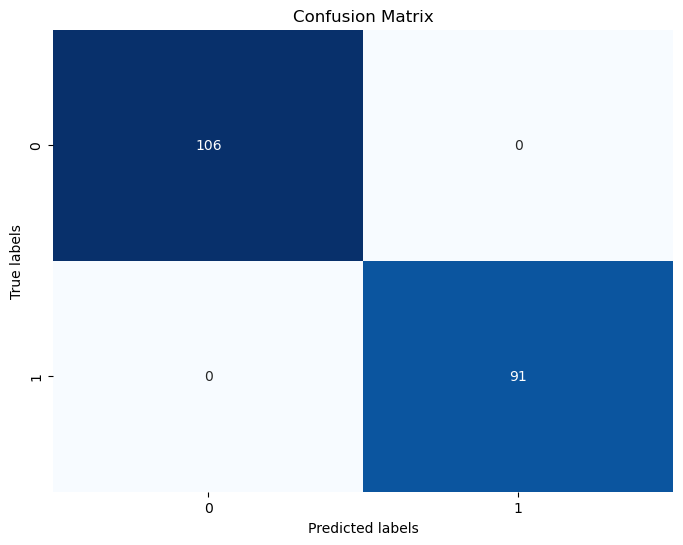

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generated confusion matrix
cm = confusion_matrix(y_pred, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

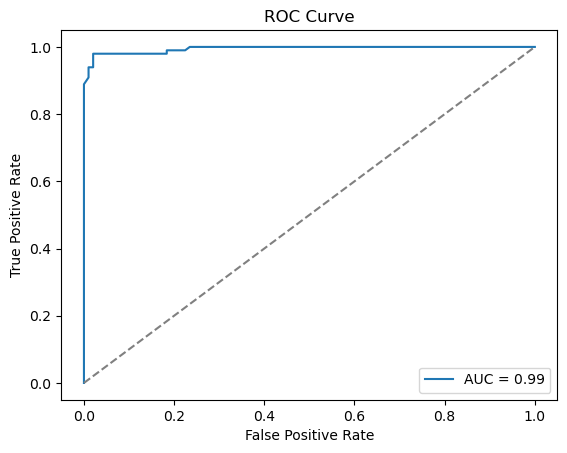

In [28]:
 from sklearn.metrics import roc_curve, roc_auc_score

#  training data X_train and y_train
rf_classifier.fit(X_train, y_train)

# calculating probabilities and plot ROC curve
y_probs = rf_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()